MULTIPLE LINEAR REGRESSION AND POLYNOMIAL REGRESSION AND BASIC ALL 

WITH CALIFONIA DATA SET

In [75]:

import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns 

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

In [76]:
#show data set 
california=fetch_california_housing(as_frame=True)
df=california.frame.copy()
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Feature Descriptions:

MedInc: Median income of households in the block (measured in tens of thousands of US dollars).

HouseAge: Median age of the houses in the block (in years).

AveRooms: Average number of rooms per household in the block.

AveBedrms: Average number of bedrooms per household in the block.

Population: Total number of people living in the block.

AveOccup: Average number of occupants per household in the block.

Latitude: Geographic latitude of the block; higher values indicate farther north.

Longitude: Geographic longitude of the block; higher values indicate farther west.

MedHouseVal: Median house value for households in the block (in US dollars).

In [77]:
df.shape

(20640, 9)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<Axes: >

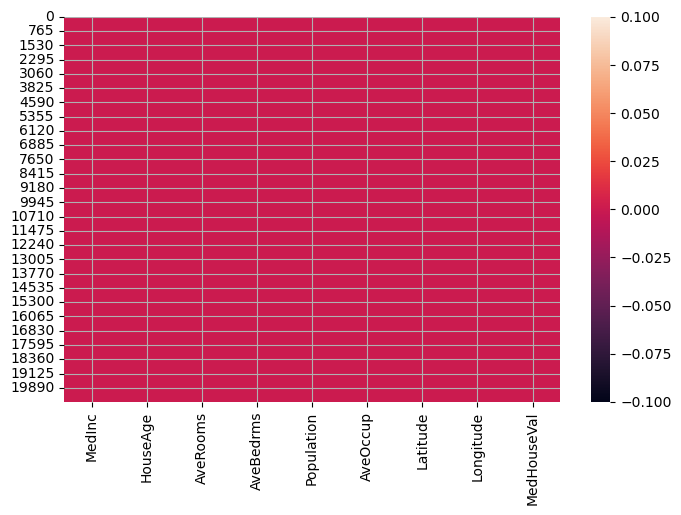

In [80]:
sns.heatmap(df.isnull())
#here is no outliar ot this code all is clear 

Here target Y 

Candidate feature is (X)

In [81]:
df.select_dtypes(include=['int64','float64'])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [82]:
#define target  columns and feature columns 
target='MedHouseVal'
feature_col=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
x=df[feature_col]
y=df[target]
x.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [83]:
x.shape

(20640, 6)

In [84]:
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [85]:
y.shape

(20640,)

In [86]:
#simple correlation matrix between selected feture and target columns
corr_matrix=df[feature_col+[target]].corr()
print('correlation matrix')
print(corr_matrix)


correlation matrix
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


we see that MedInc has very big relation ship in target value which is 0.688075 then the relation HouseAge 0.105623 then relation 

Averooms which is 0.1519 percent

In [87]:
#step 1 for implementation 
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape


(16512, 6)

In [88]:
x_test.shape

(4128, 6)

In [89]:
#create and fit linear regression

lin_reg=LinearRegression()

#fit () learns the best coefficients from the training data
lin_reg.fit(x_train,y_train)
print("model fitted successfully")

model fitted successfully


In [90]:
#step 3: Inspect learned  parameters (m and c)

print("Intercept (bias term ): ", lin_reg.intercept_)
print("\ncoefficients : ")
for feature_name,coef in zip(feature_col,lin_reg.coef_):
#amra protita feature ar coef dektesi ak sathe mane weight w1x1+w2x2+
     print(f'{feature_name}:{coef}')

Intercept (bias term ):  -0.5528727644614526

coefficients : 
MedInc:0.546160779107426
HouseAge:0.016787909062568926
AveRooms:-0.22391994400480075
AveBedrms:1.11549261148084
Population:2.3167197368147152e-05
AveOccup:-0.00461823134540692


here the weight value for every feature value 


In [91]:
#Step make prediction on training and test sets 
y_train_Pred=lin_reg.predict(x_train)
y_test_Pred=lin_reg.predict(x_test)

print('Some sample prediction  on test set (First 5 rows)')
print("Predicted : ",y_test_Pred[:5])#prediction value dekbo test ar 
print("Actual : ",y_test.values[:5])# actual value dekboo test ar

Some sample prediction  on test set (First 5 rows)
Predicted :  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual :  [0.477   0.458   5.00001 2.186   2.78   ]


In [92]:
#step 5 : define a helper function to print evaluation metrics
#ai fun ar maddhome amra train data and train data theke predict ar error dekbo 
#then y test data and y test datar modde error dekbo konta beshi ba kom hoy ta ber korbo


def regression_metrics(y_true,y_pred,label='Model'):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_true,y_pred)
    print(f'==== {label} ====')
    print("MAE :",mae)
    print("MSE :",mse)
    print("RMSE :",rmse)
    print("R2 :",r2)
    print()

#Evaluate on train and test

regression_metrics(y_train,y_train_Pred,label='Linear regression(Train)')
regression_metrics(y_test,y_test_Pred,label='Linear regression(Test)')



==== Linear regression(Train) ====
MAE : 0.5708698051066725
MSE : 0.6070093832609208
RMSE : 0.7791080690513484
R2 : 0.5459161602818385

==== Linear regression(Test) ====
MAE : 0.5792140665454443
MSE : 0.642187231453487
RMSE : 0.8013658536857475
R2 : 0.5099337366296416



result onk kharap ditese  r2 o onk kharap ditese kintu r2 minimum .75 ar upore 

dibe output  tahole output bhalo hisebe consider hobe 

TypeError: 'str' object is not callable

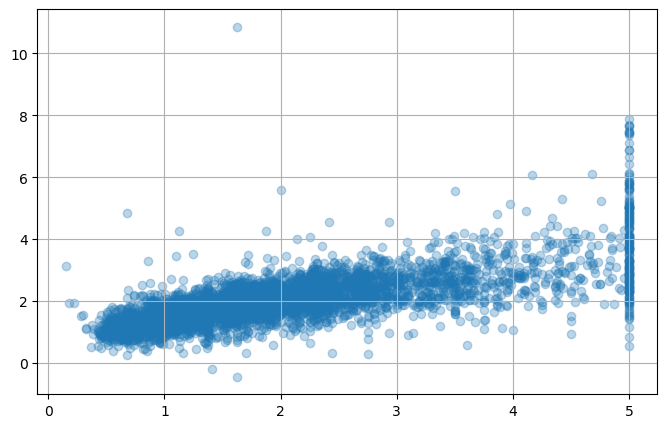

In [93]:
# plot actual and predicted values on the test set 

plt.figure()
plt.scatter(y_test,y_test_Pred,alpha=0.3)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted House Values (Test Set)")

#Diagonal reference Line
min_val=min(y_test.min(),y_test_Pred.min())
max_val=max(y_test.max(),y_test_Pred.max())
plt.plot ([min_val,max_val],[min_val,max_val],linestyle="--")
plt.tight_layout()
plt.show()

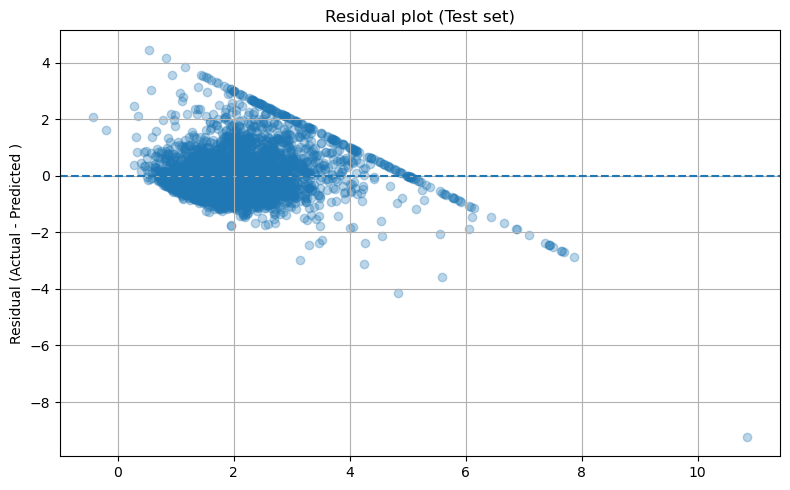

In [ ]:
#step 7 : Residual plot (errors = actual - predicted)

residual=y_test - y_test_Pred

plt.figure()
plt.scatter(y_test_Pred,residual,alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel=('Predicted medHouseVal')
plt.ylabel("Residual (Actual - Predicted )")
plt.title("Residual plot (Test set)")
plt.tight_layout()
plt.show()

In [ ]:
residual

20046   -0.524005
3024    -1.102056
15663    2.322877
20484   -0.461633
9814     0.797700
           ...   
15362    0.763106
16623    1.205409
18086    0.632482
2144    -0.778368
3665    -0.438687
Name: MedHouseVal, Length: 4128, dtype: float64

residual= 0 is means perfect prediction 

residual>0 is means model predicted is toolow

residual < 0 is means model predicted is too high 

Over all means that our model dont fit this dataset because it prediction error 

is too high and also r2 score is too bad 50 so our multiple linear regression 

is not perfect for the data set so we also see that this error plot also also 

show that this error are also negative show perfect error are  0 so the model 

is not perfect for the overall data set 

TOPIC :  POLYNOMIAL REGRESSION



POLYNOMIAL REGRESSION KEEOS THE MODEL LINEAR IN PARAMETERS BUT ALLOWS  

NONLINEAR RELATIONS BETWEEN THE INPUT FEATURE AND THE TARGET FEATURE 

*uSE A SINGLE FEATURE "MedInc"(median income) to predict MedHouseVal

*Fit simple linear model on this single feature 

In [ ]:
#Prepare a single for illustration MedInc vs MedHouseVal

x_single=df[["MedInc"]] #dataframe with one column 
y_single=df[target]

x_single_train,x_single_test,y_single_train,y_single_test=train_test_split(x_single,y_single,test_size=0.2,random_state=42)

print("single feature training shape :",x_single_train.shape)

print("single feature test shape :",x_single_test.shape)

single feature training shape : (16512, 1)
single feature test shape : (4128, 1)


In [ ]:
#fit simple linear regression model using only Med\inc 
lin_reg_single=LinearRegression()
lin_reg_single.fit(x_single_train,y_single_train)
y_single_test_pred=lin_reg_single.predict(x_single_test)

# using avobe function where we predict the error now we call the same fun
#here the we predict the error than calculate here the error for this linear 
# regression

regression_metrics(y_single_test,y_single_test_pred,label='single Feature Linear regression(Test)')

==== single Feature Linear regression(Test) ====
MAE : 0.629908653009376
MSE : 0.7091157771765549
RMSE : 0.8420901241414455
R2 : 0.45885918903846656



 HERE ERROR IS TOO HIGH AND R2 IS TOO LOW SO THE MODEL IS NOT PERFECT FOR THE 
 
 DATASET

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: 'str' object is not callable

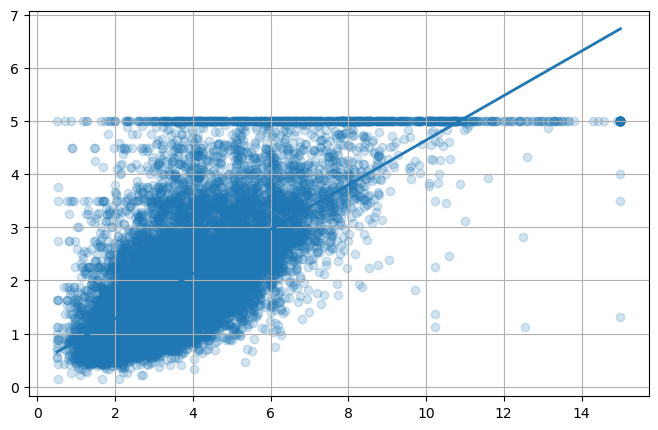

In [ ]:
# VISUALIZE THE LINEAR FIT FOR THE SINGLE FEATURE MODEL 

#CREATE A GRID OF MEDINC VALUES FOR A SMOOTH LINE
x_plot= np.linspace(x_single["MedInc"].min(),x_single['MedInc'].max(),200).reshape(-1,1)

y_plot_lin=lin_reg_single.predict(x_plot)

plt.figure()
plt.scatter(x_single_train['MedInc'],y_single_train,alpha=0.2,label="Train data")
plt.plot(x_plot,y_plot_lin,linewidth=2,label="liner fit (Degree 1)")

plt.xlabel("MedInc")          
plt.ylabel("MedHouseval")    
plt.title("Single feature linear regression : MedInc vs MedHouseval")
plt.legend()
plt.tight_layout()
plt.show()

 HERE IN THIS MODEL IS NOT PERFECT BECAUSE THIS BEST FIT LINE NOT COVER ALL THE DATA POINT SO IT NOT PERFECT FOR THE DATA POINT 
 

****CODING POLYNOMIAL REGRESSION ON REAL DATA ****

In [98]:
#COMPARE POLYNOMIAL REGRESSION MODELS PF DIFFERENT DEGRESS ON THE SINGLE FEATURE 'MEDINC'

degrees=[1,2,3,5,7,12]# degree barale over fit houyar possibility thake 
results = []

for deg in degrees:
    model=Pipeline(
    [
        ('poly',PolynomialFeatures(degree=deg, include_bias=False)),
        ("lin_reg",LinearRegression())
    ]
    )

    model.fit(x_single_train,y_single_train)
    y_train_Pred_deg=model.predict(x_single_train)
    y_test_Pred_deg=model.predict(x_single_test)
#here it is for train data 
    mae_train=mean_absolute_error(y_single_train,y_train_Pred_deg)
    rmse_train=np.sqrt(mean_squared_error(y_single_train,y_train_Pred_deg))
    r2_train=r2_score(y_single_train,y_train_Pred_deg)


#here is the for test  data
    mae_test=mean_absolute_error(y_single_test,y_test_Pred_deg)
    rmse_test=np.sqrt(mean_squared_error(y_single_test,y_test_Pred_deg))
    r2_test=r2_score(y_single_test,y_test_Pred_deg)
#result print kore dekhar jonno dictionary te raklam 
    results.append({
        "degree":deg,
        "MAE_train":mae_train,
        "RMSE_train":rmse_train,
        "R2_train":r2_train,
        "MAE_test":mae_test,
        "RMSE_test":rmse_test,
        "R2_test":r2_test,

    })

results_df=pd.DataFrame(results)
results_df


,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,0.624951,0.836149,0.476993,0.629909,0.842090,0.458859
1,2,0.624049,0.832459,0.481598,0.628292,0.838614,0.463318
2,3,0.615010,0.825033,0.490806,0.621896,0.835641,0.467116
3,5,0.614411,0.824844,0.491039,0.621369,0.835892,0.466796
4,7,0.612486,0.822268,0.494214,0.618768,0.832553,0.471047
5,12,0.620694,0.829216,0.485629,0.628157,0.840815,0.460497


here we see that if we increase the degreee than its r2 score is fall thats 

means our model is propability to over fit 

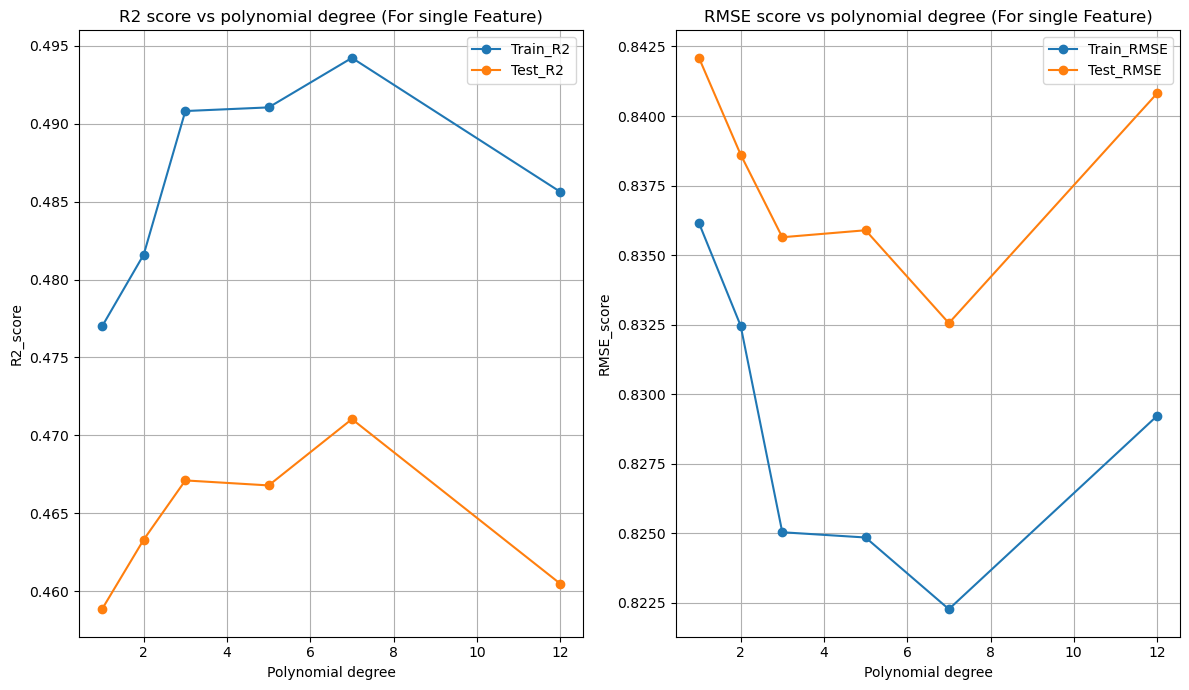

In [99]:
# plot the R Squared and RMSE Vs Polynomial degree

fig,axes=plt.subplots(1,2,figsize=(12,7))


#R squared plot
axes[0].plot(results_df['degree'],results_df['R2_train'],marker='o',label="Train_R2")
axes[0].plot(results_df['degree'],results_df['R2_test'],marker='o',label="Test_R2")
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2_score")
axes[0].set_title("R2 score vs polynomial degree (For single Feature)")
axes[0].legend()

#RMSE plot
axes[1].plot(results_df['degree'],results_df['RMSE_train'],marker='o',label="Train_RMSE")
axes[1].plot(results_df['degree'],results_df['RMSE_test'],marker='o',label="Test_RMSE")
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE_score")
axes[1].set_title("RMSE score vs polynomial degree (For single Feature)")
axes[1].legend()

plt.tight_layout()
plt.show()